# TCSS 588 Ensemble Project Winter  2019

#### This notebook contains the code to calculate the accuracy of a decision tree and extra tree classifier trained, and then using the coefficients of the trained classifier to deterine the important genes. 
#### To summarize, here are the steps this  notebook takes:
####  Step 1. Load the gene data for 1000 genes.
#### Step 2. Remove the entry_id column from this data
#### Step 3. Train a Decision Tree Classifier using this data using 5 fold cross validation
#### Step 5: Train an Extra Trees Classifier using this data using 5 fold cross validation
#### Step 4: Determine the genes that are important using the Extra Trees Classifier
#### Step 6: Determine the genes that are important using the Decision Classifier

### Dependencies
### Data Files

#### 1. The file  data\\aml.data.RNA.1k.csv - this has the  data
#### 2. The file data\\aml.data.labels.csv  - this file  has the Y values - the class we would like to predict

### Packages

#### This code depends on the following python packages:
#####  os, sklearn, pandas, 


## Step 1. Load the Data

#### We load the training data and the testing data. 
####  a. First laod the RNA genes data file. 
####  Also drop the entry_id column from it since that is a primary key and not required for  training or classification purposes. The data from both the files match based on the entry_id


In [29]:
import os
os.getcwd()

'C:\\Users\\radeshpa\\Desktop\\New folder (2)'

# Step 1. First for 1k data set

In [30]:
dataSize = "1k"

In [55]:
# Ensure these paths are valid
import pandas as pd
inputDataFile = "data\\aml.data.RNA.1k.csv"
labelDataFile = "data\\aml.data.labels.csv"
X_Original = pd.read_csv(os.path.join(os.getcwd(), inputDataFile))

# Drop the entry id column
X = X_Original.drop(X_Original.columns[0], axis=1)
X.head()
X.shape

(177, 1017)

#### b. Load the output classifier data. Once again, drop the risk_entry columnn.

In [56]:
y_Original = pd.read_csv(os.path.join(os.getcwd(), labelDataFile))
# Drop the entry id
y = y_Original.drop(y_Original.columns[0], axis=1)
y.head()
y.shape

(177, 1)

# Step 2. Generate Training and Test Sets

#### a.  Create an instance of KFold to split the data into 5 folds.

In [33]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


splitCount = 5

# Setting the random state ensures identical results.

kFolds = KFold(n_splits = splitCount, shuffle=False, random_state=3)


#### b. Now perform 5-fold cross validation for  decision tree model.

In [34]:
allTreeAccuracyValues = []
allTreeFeatureImportanceValues = []
allTreeModels = []

for train_index, test_index in kFolds.split(X):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    tree = DecisionTreeClassifier()
    treeResult = tree.fit(X_train, y_train)
    y_prediction = treeResult.predict(X_test)
    y_actual = y_test['risk'].values
    accuracy = (y_prediction == y_actual).sum()/len(y_actual)
    allTreeAccuracyValues.append(accuracy * 100)
    allTreeFeatureImportanceValues.append(treeResult.feature_importances_)
    allTreeModels.append(treeResult)

allTreeAccuracyValues

c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\

[80.55555555555556,
 83.33333333333334,
 82.85714285714286,
 88.57142857142857,
 94.28571428571428]

#### Write the accuracies of the decision tree to  a csv file for analyzing later.

In [35]:
treeAccuracyValuesFrame = pd.DataFrame(allTreeAccuracyValues, columns=['Accuracy'])
treeAccuracyValuesFrame.to_csv("data\\{}_tree_accuracyValues.csv".format(dataSize))
treeAccuracyValuesFrame


,Accuracy
0,80.555556
1,83.333333
2,82.857143
3,88.571429
4,94.285714


#### c. Perform 5-fold cross validation using the ExtraTreesClassifier model.

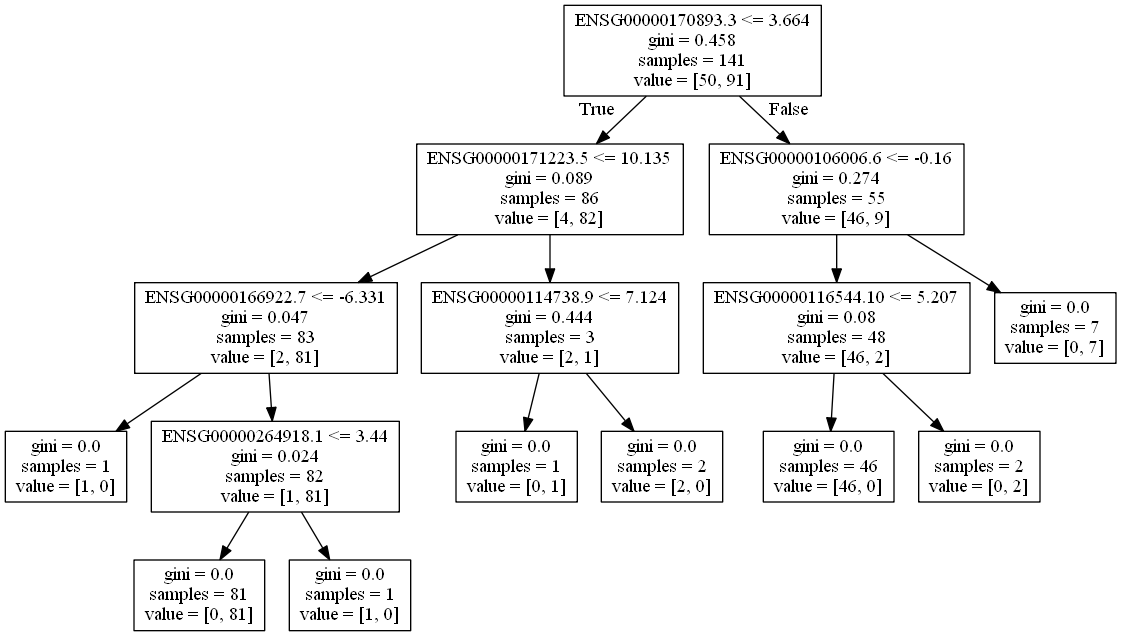

In [36]:
from sklearn import tree
import pydotplus
from IPython.display import Image

featureNames = X.columns.get_values().tolist()

dot_data = tree.export_graphviz(allTreeModels[1], out_file=None, feature_names=featureNames)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
image = Image(graph.create_png())


# Create PNG
graph.write_png("1k_decision_tree.png")

image

In [37]:
from sklearn.ensemble import ExtraTreesClassifier


allExtraTreeAccuracyValues = []
allExtraTreeFeatureImportanceValues = []
allExtraTreeModels = []


for train_index, test_index in kFolds.split(X):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    num_trees = 10
    extraTree = ExtraTreesClassifier(n_estimators=num_trees)
    extraTreeResult = extraTree.fit(X_train, y_train)
    y_prediction = extraTreeResult.predict(X_test)
    y_actual = y_test['risk'].values
    accuracy = (y_prediction == y_actual).sum()/len(y_actual)
    
    allExtraTreeAccuracyValues.append(accuracy * 100)
    allExtraTreeFeatureImportanceValues.append(extraTreeResult.feature_importances_)
    allExtraTreeModels.append(treeResult)
    
allExtraTreeAccuracyValues

c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
c:\users\radeshpa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

[86.11111111111111,
 91.66666666666666,
 97.14285714285714,
 94.28571428571428,
 91.42857142857143]

In [38]:
allExtraTreeModels[1].classes_

array([0, 1], dtype=int64)

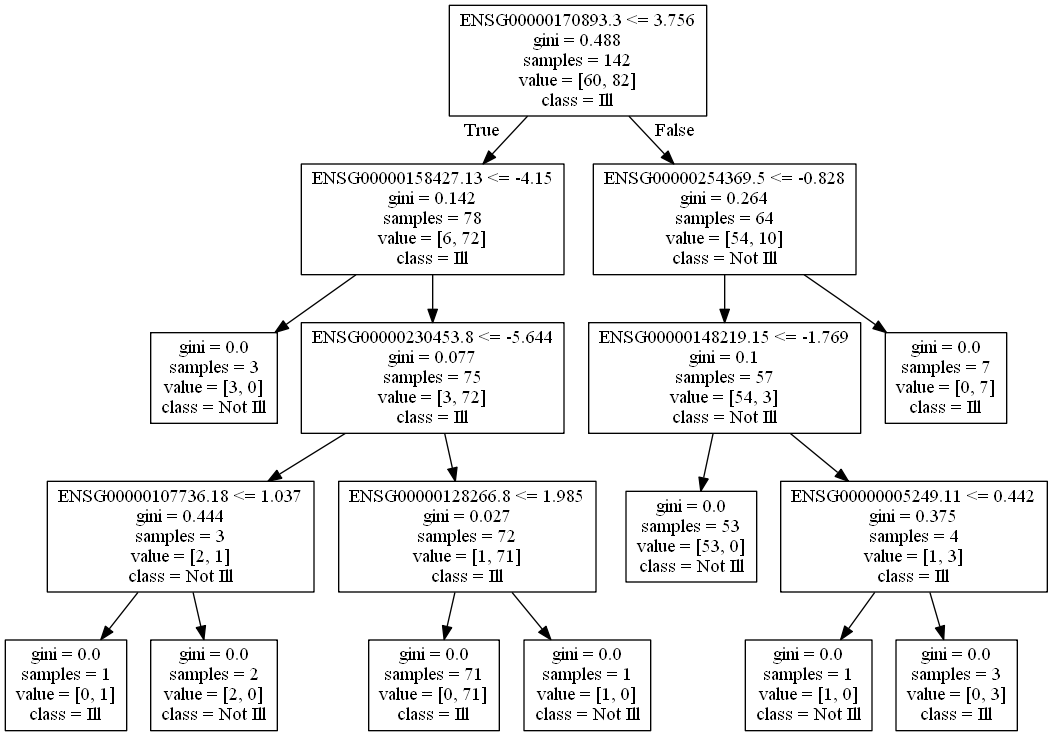

In [39]:
from sklearn import tree
import pydotplus
from IPython.display import Image

featureNames = X.columns.get_values().tolist()

# You have to indicate the class names in ascending numerical order
classNames = ['Not Ill', 'Ill']

dot_data = tree.export_graphviz(allExtraTreeModels[1], out_file=None, feature_names=featureNames, class_names = classNames)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
image = Image(graph.create_png())


# Create PNG
graph.write_png("1k_extra_tree.png")

image

# SOME ADDITIONAL NOTES
# 1. The gini impurity is being used to determine which feature to split at.


#### Write the accuracies of the Extra Trees Classifier to a csv file so we can analyze them later.

In [40]:
extraTreeAccuracyValuesFrame = pd.DataFrame(allExtraTreeAccuracyValues, columns=['Accuracy'])
extraTreeAccuracyValuesFrame.to_csv("data\\{}_extratrees_accuracyValues.csv".format(dataSize))
extraTreeAccuracyValuesFrame

,Accuracy
0,86.111111
1,91.666667
2,97.142857
3,94.285714
4,91.428571


# Step 3.  Calculate the  Feature Importance Values

### 3.1: Calculate for Extra Trees Classifier Feature Importance Values

#### a. First acquire all the column names.

In [41]:
columnNames = X.columns.get_values().tolist()

#### b. Get the important features for the extra trees classifier

In [42]:
import pandas as pd

extraTreeGiniValuesFrame = pd.DataFrame(columns=columnNames)
extraTreeGiniValuesFrame.columns = columnNames

# Iterate over the feature importance values for every model.
for i in range(len(allExtraTreeFeatureImportanceValues)):    
    extraTreeGiniValuesFrame = extraTreeGiniValuesFrame.append(dict(zip(columnNames, allExtraTreeFeatureImportanceValues[i])), ignore_index=True)

directory = 'data\\{}'.format(dataSize)
import os
if not os.path.exists(directory):
    os.makedirs(directory)

# Write the results to a CSV File.
outputFileName = 'data\\{}\\{}_extra_tree_feature_importance_all.csv'.format(dataSize, dataSize)
extraTreeGiniValuesFrame.to_csv(outputFileName)
extraTreeGiniValuesFrame

,ENSG00000000003.13,ENSG00000002586.16,ENSG00000003436.13,ENSG00000004139.12,ENSG00000004399.11,ENSG00000005073.5,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005249.11,ENSG00000005381.7,...,ENSG00000278969.1,ENSG00000279692.1,ENSG00000279766.1,ENSG00000279978.1,ENSG00000280206.1,ENSG00000280255.1,ENSG00000280303.2,ENSG00000280721.1,ENSG00000280777.1,ENSG00000281205.1
0,0.0,0.000000,0.0,0.0,0.001913,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.002268,0.000000,0.0,0.0,0.0,0.00000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.006263,0.0,0.0,0.0,0.00000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000194,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00262,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.002320,0.000000,0.0,0.0,0.010767,...,0.0,0.0,0.000215,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000
4,0.0,0.022774,0.0,0.0,0.000000,0.005878,0.009019,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000311,0.0,0.0,0.0,0.00000,0.002405


#### c. Now get the mean for every gene, and then sort the genes based on mean importance. This is useful for analysis

In [43]:
# Calculate the mean importance for all the genes for Extra Trees
extraTreeGiniValuesFrameMean = pd.DataFrame(columns = extraTreeGiniValuesFrame.columns)
extraTreeGiniValuesFrameMean.loc[0] = extraTreeGiniValuesFrame.mean()
# Sort the results based on importance values
extraTreeGiniValuesFrameMean = extraTreeGiniValuesFrameMean.sort_values(extraTreeGiniValuesFrameMean.last_valid_index(), axis=1, ascending = False)
extraTreeGiniValuesFrameMean

,ENSG00000122592.7,ENSG00000260182.1,ENSG00000254369.5,ENSG00000132975.7,ENSG00000105997.21,ENSG00000253187.2,ENSG00000078399.14,ENSG00000179954.13,ENSG00000257718.1,ENSG00000257883.1,...,ENSG00000148219.15,ENSG00000150054.17,ENSG00000154133.13,ENSG00000150540.12,ENSG00000150627.14,ENSG00000151150.19,ENSG00000151917.16,ENSG00000152556.14,ENSG00000154016.12,ENSG00000158560.13
0,0.023356,0.023334,0.021824,0.01985,0.019569,0.015285,0.014821,0.013993,0.013784,0.012998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### d. Write the importance to a csv file

In [44]:
# Write the results to a CSV File
extraTreeGiniValuesFrameMean.transpose().to_csv("data\\{}\\{}_extra_trees_feature_importance_average.csv".format(dataSize, dataSize))

## Calculate the Importance for Decision Tree

In [45]:
allTreeFeatureImportanceValues

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05606721]),
 array([0.        , 0.        , 0.04252944, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.])]

#### Create a frame that has the coefficients for every fold. Write that frame to a csv file. 

In [46]:
import pandas as pd

decisionTreeGiniValuesFrame = pd.DataFrame(columns=columnNames)
decisionTreeGiniValuesFrame.columns = columnNames
decisionTreeGiniValuesFrame

for i in range(len(allTreeFeatureImportanceValues)):    
    decisionTreeGiniValuesFrame = decisionTreeGiniValuesFrame.append(dict(zip(columnNames, allTreeFeatureImportanceValues[i])), ignore_index=True)

decisionTreeGiniValuesFrame
outputFileName = 'data\\{}\\{}_decisiontree_feature_importance_all.csv'.format(dataSize, dataSize)
decisionTreeGiniValuesFrame.to_csv(outputFileName)

In [47]:
decisionTreeGiniValuesFrame
outputFileName = 'data\\{}\\{}_decisiontree_feature_importance_all.csv'.format(dataSize, dataSize)
decisionTreeGiniValuesFrame.to_csv(outputFileName)

### For analysis, acquire the mean value of the importance of every gene for all the folds. Write that to a csv file as well.

In [48]:
# Calculate the mean importance for all the genes for Extra Trees
# And then store the results in a new frame.
decisionTreeGiniValuesFrameMean = pd.DataFrame(columns = decisionTreeGiniValuesFrame.columns)
decisionTreeGiniValuesFrameMean.loc[0] = decisionTreeGiniValuesFrame.mean()
# Sort the results based on importance values
decisionTreeGiniValuesFrameMean = decisionTreeGiniValuesFrameMean.sort_values(decisionTreeGiniValuesFrameMean.last_valid_index(), axis=1, ascending = False)

outputFileName = 'data\\{}\\{}_decisiontree_feature_importance_average.csv'.format(dataSize, dataSize)
decisionTreeGiniValuesFrameMean.transpose().to_csv(outputFileName)
decisionTreeGiniValuesFrameMean

,ENSG00000170893.3,ENSG00000106006.6,ENSG00000267453.5,ENSG00000254369.5,ENSG00000135842.15,ENSG00000270182.1,ENSG00000158427.13,ENSG00000148219.15,ENSG00000116544.10,ENSG00000281205.1,...,ENSG00000134242.14,ENSG00000134470.18,ENSG00000134531.8,ENSG00000134569.8,ENSG00000134590.12,ENSG00000134716.8,ENSG00000135069.12,ENSG00000135077.7,ENSG00000135272.8,ENSG00000158560.13
0,0.630603,0.073739,0.053003,0.032299,0.025288,0.019858,0.015346,0.012076,0.011879,0.011213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 4. Data Analysis

#### a. Get all the genes that are relevant for the decision tree classifier. 

### Figure out the genes that are common between the decision tree and the extra tree.

In [49]:
# Find the common columns
decisionTreeColumns = [col for col in decisionTreeGiniValuesFrameMean.columns if decisionTreeGiniValuesFrameMean[col].iloc[0] > 0]
extraTreeColumns = [col for col in extraTreeGiniValuesFrameMean.columns if extraTreeGiniValuesFrameMean[col].iloc[0] > 0]
decisionTreeColumns
extraTreeColumns

# Find the common columns
commonColumns = set(decisionTreeColumns).intersection(extraTreeColumns)


# Filter the importance values for these columns only
commonTreeImportanceValues = decisionTreeGiniValuesFrameMean[list(commonColumns)]
commonExtraTreeImportanceValues = extraTreeGiniValuesFrameMean[list(commonColumns)]

commonTreeImportanceValues.T.to_csv("data\\{}\\{}_decision_tree_common_importance.csv".format(dataSize,dataSize))
commonExtraTreeImportanceValues.T.to_csv("data\\{}\\{}_extra_tree_common_importance.csv".format(dataSize,dataSize))


# Visualizations

In [ ]:
#  Let us see the distribution of the classes

In [85]:
# Combine the data from the two files
# Display heat map per gene to see if  it is differentially expressive.
combined = pd.merge(X_Original, y_Original, on='entity_id')
combinedSorted = combined.sort_values(by ='risk')
combinedWithoutId =  combined.drop(combined.columns[0], axis = 1)
combinedWithoutId.head()

,ENSG00000000003.13,ENSG00000002586.16,ENSG00000003436.13,ENSG00000004139.12,ENSG00000004399.11,ENSG00000005073.5,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005249.11,ENSG00000005381.7,...,ENSG00000279692.1,ENSG00000279766.1,ENSG00000279978.1,ENSG00000280206.1,ENSG00000280255.1,ENSG00000280303.2,ENSG00000280721.1,ENSG00000280777.1,ENSG00000281205.1,risk
0,-3.317718,7.573619,7.496639,0.030044,5.451009,-5.407333,-6.927145,4.093628,1.013300,10.097053,...,0.875287,3.787028,4.391355,3.704522,-5.407333,0.566979,3.611587,0.030044,-2.267335,1
1,-1.780950,7.051258,3.346200,2.184251,6.213580,-3.720951,-3.230079,5.109320,6.010799,9.286936,...,0.689439,-0.711582,4.986294,2.566059,-1.209631,-1.908319,-1.272516,-0.626973,0.678398,1
2,-0.160015,7.439541,4.448980,2.122186,4.564866,-2.917363,-4.025029,4.699963,5.416719,8.866774,...,1.316872,1.046554,4.310124,2.350056,-2.298227,-0.710189,1.347360,-1.775996,-1.962853,1
3,-2.056501,8.326120,-0.251195,2.746839,7.067713,0.814961,-0.764468,4.309663,3.253584,7.392326,...,2.039168,-0.186234,4.404977,2.689578,-6.927145,-0.672618,-4.747010,-1.449441,-4.143354,1
4,-1.964343,6.281959,1.371009,2.474164,5.690037,2.496030,-6.083680,4.815941,3.668680,7.908177,...,1.041103,0.612670,5.174884,3.112768,-6.083680,-0.700733,-0.337343,0.891772,-2.160884,1


177
72
105


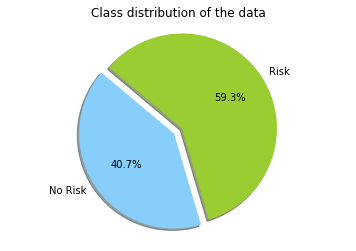

In [100]:
# Create a pie chart to see the class distribution
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'No Risk', 'Risk'
noRiskCount = len(combinedWithoutId[combinedWithoutId['risk'] == 0])
riskCount = len(combinedWithoutId[combinedWithoutId['risk'] == 1])
print(len(combinedWithoutId))
print(noRiskCount)
print(riskCount)

sizes = [noRiskCount, riskCount]
colors = ['lightskyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class distribution of the data')
plt.axis('equal')
plt.show()



In [101]:
# This means that our data is well distributed.
# We can also draw a heat map of the data.

(1017, 177)


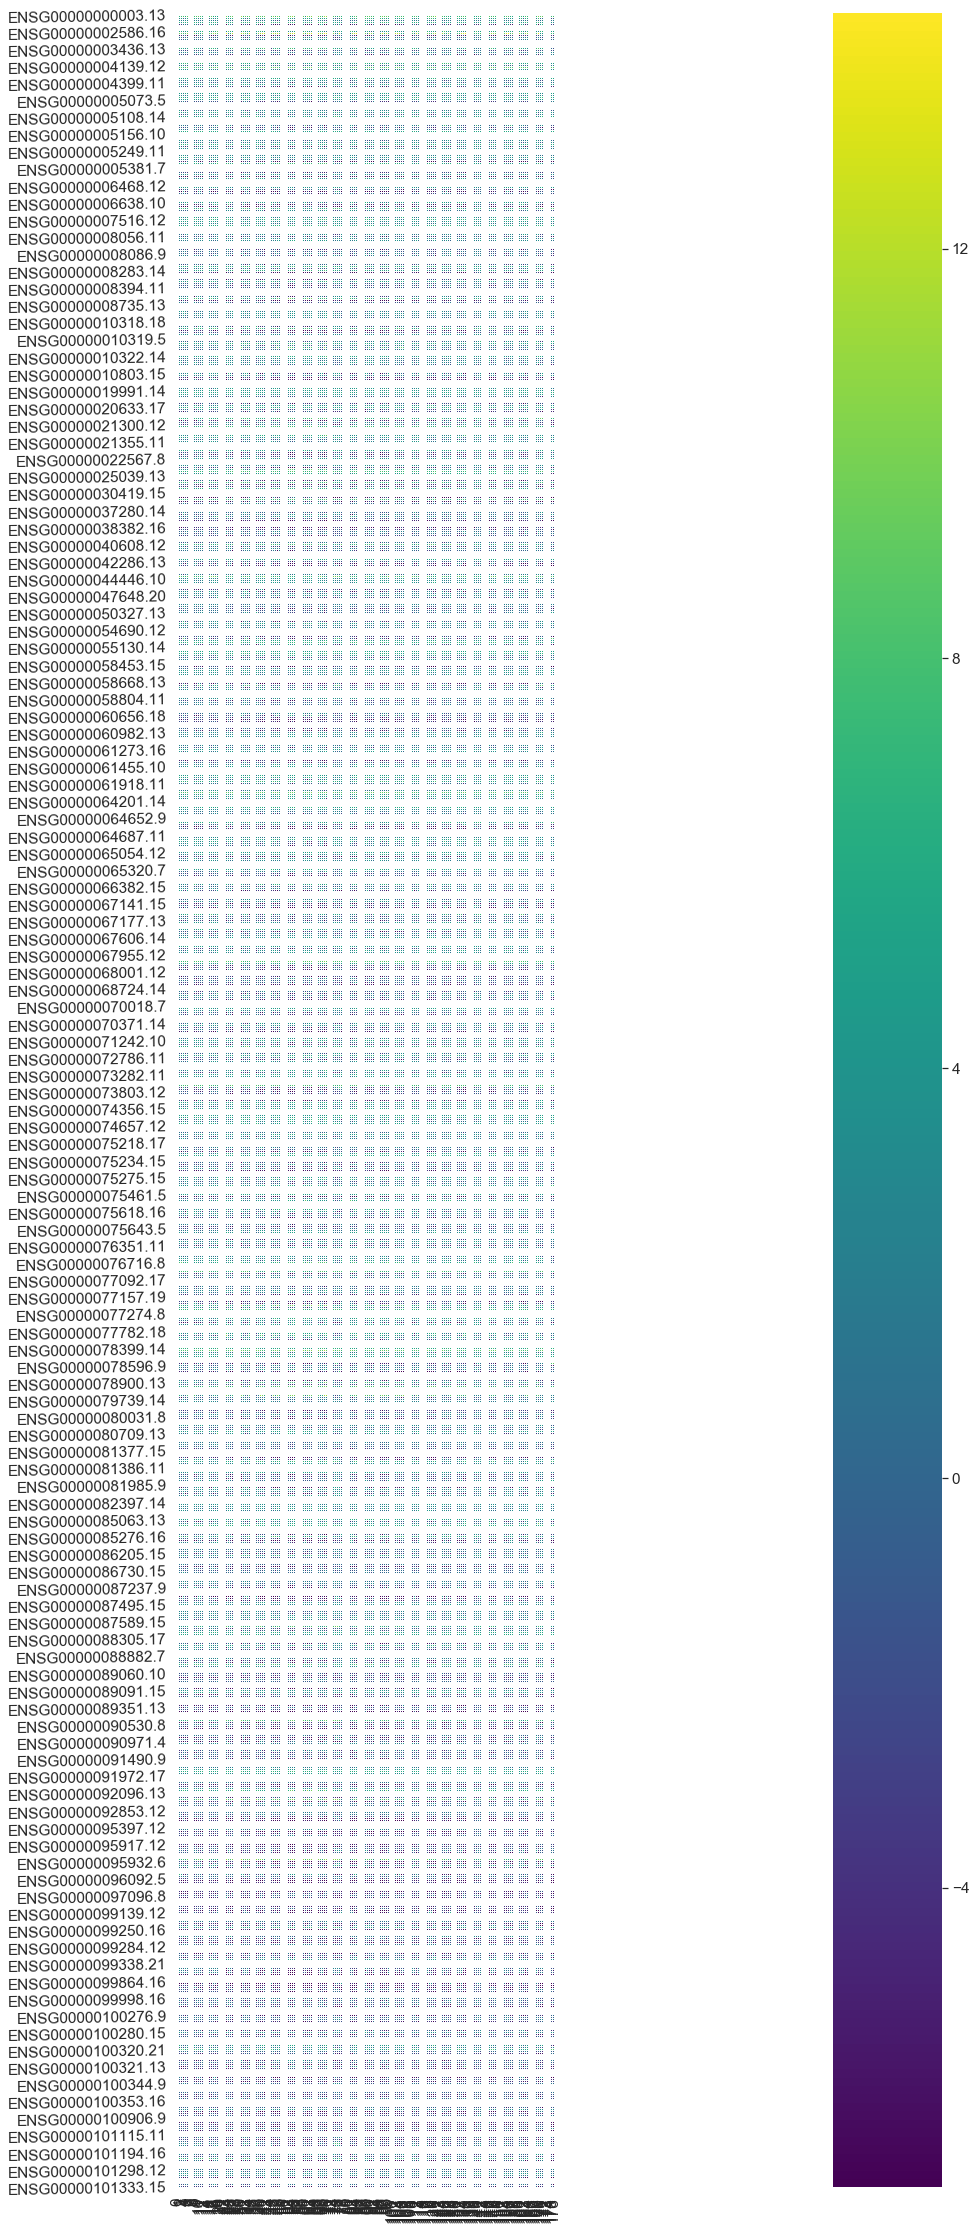

In [107]:

## We draw a 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns

# Define the two groups 
#group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group1 = X.columns.values
group1
group2 = [''] * len(X_Original['entity_id'].values)
#group2 = X_Original['entity_id'].values
group2

data = X.T.values
data
print(data.shape)
# Create a figure

a4_dims = (100,40)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(font_scale=1.4)
heatMap = sns.heatmap(data, fmt="g", cmap='viridis', linewidths=.5, square = True)
ax.set_yticklabels(group1, rotation=1)
plt.show()

### Step 1. Display the accuracy variation for the decision tree model.

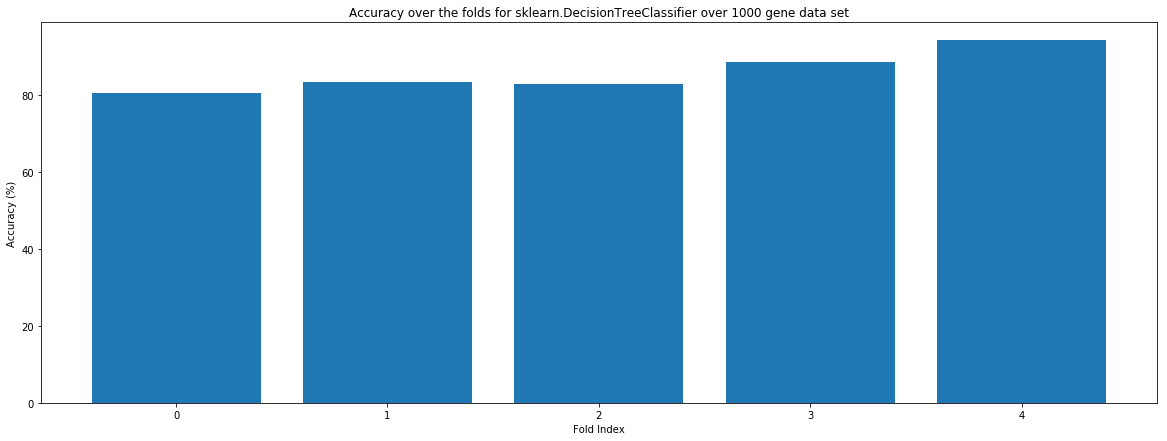

In [50]:
# Create Visualizations for the Accuracy of multiple folds for Decision Tree Classifier
# This is typically useful when for instance we have a larger number of folds, and would like to examine how the
# accuracy is changing for the classifier over the folds - whether it is steady or not.
# Display Accuracy of Decision Tree - All Folds

# Create transpose for plotting
treeAccuracyValuesFrameTranspose = treeAccuracyValuesFrame.T 
treeAccuracyValuesFrameTranspose


import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

fig = plt.figure(figsize=(20,7))

plt.bar(treeAccuracyValuesFrameTranspose.columns.values, treeAccuracyValuesFrameTranspose.iloc[0].values, align='center', alpha=1)
plt.title('Accuracy over the folds for sklearn.DecisionTreeClassifier over 1000 gene data set')
plt.ylabel('Accuracy (%)')
plt.xlabel('Fold Index')
plt.savefig("visualizations\\{}\\{}_decision_tree_accuracy.png".format(dataSize, dataSize))

plt.show()
# Save the file
# Show graph

### Step 2. Display the accuracy variation for the decision tree model.

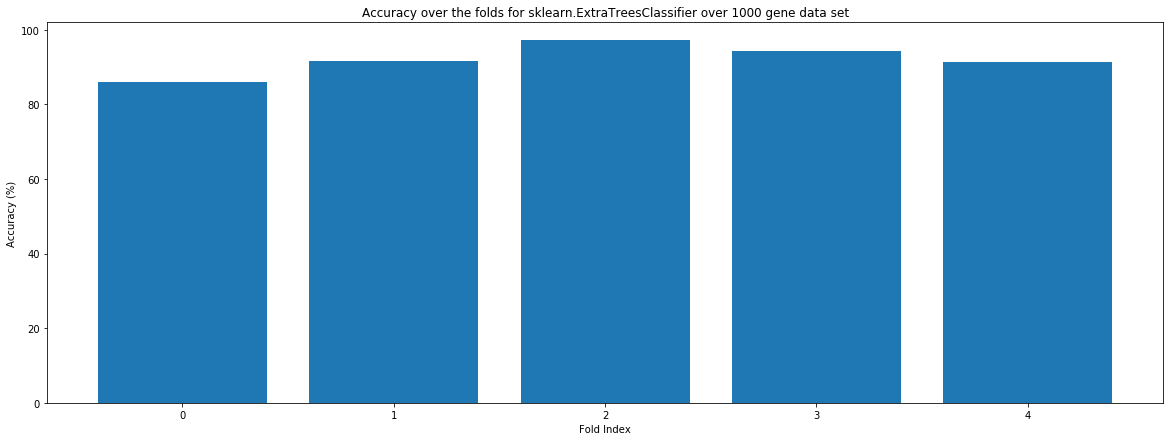

In [51]:
# Create Visualizations for the Accuracy of multiple folds for Decision Tree Classifier
# This is typically useful when for instance we have a larger number of folds, and would like to examine how the
# accuracy is changing for the classifier over the folds - whether it is steady or not.
# Display Accuracy of Decision Tree - All Folds

# Create transpose for plotting
extraTreeAccuracyValuesFrameTranspose = extraTreeAccuracyValuesFrame.T 
extraTreeAccuracyValuesFrameTranspose


import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

fig = plt.figure(figsize=(20,7))

plt.bar(extraTreeAccuracyValuesFrameTranspose.columns.values, extraTreeAccuracyValuesFrameTranspose.iloc[0].values, align='center', alpha=1)
plt.title('Accuracy over the folds for sklearn.ExtraTreesClassifier over 1000 gene data set')
plt.ylabel('Accuracy (%)')
plt.xlabel('Fold Index')
plt.savefig("visualizations\\{}\\{}_extra_tree_accuracy.png".format(dataSize, dataSize))

plt.show()
# Save the file
# Show graph

## Step 3. Show Importance of the Genes  in Descending Order, for Extra Tree Classifier (only the top 20 ones for clarity)

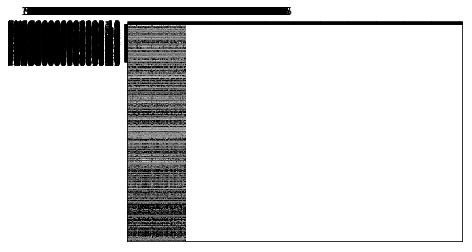

In [79]:
X.T.shape[0]
import numpy as np
import matplotlib.pyplot as plt

# Define the two groups 
#group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group1 = X.columns.values
group1
group2 = X_Original['entity_id'].values
group2

data = X.T.values
data.shape
# Create a figure
fig, ax = plt.subplots()

heatmap = ax.pcolor(data, cmap=plt.cm.gray)
# Add major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

# Make it look like a table 
ax.invert_yaxis()
ax.xaxis.tick_top()

# Add tick labels
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)

plt.show()

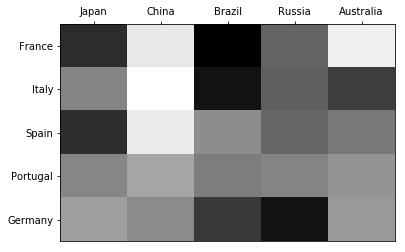

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two groups 
#group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany'] 
group1 = X.columns.values.to_list()
group2 = ['Japan', 'China', 'Brazil', 'Russia', 'Australia']

# Generate some random values
data = np.random.rand(5, 5)

# Create a figure
fig, ax = plt.subplots()

# Create the heat map
heatmap = ax.pcolor(data, cmap=plt.cm.gray)

# Add major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

# Make it look like a table 
ax.invert_yaxis()
ax.xaxis.tick_top()

# Add tick labels
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)

plt.show()

In [58]:
## Power BI Visualizations
X_Original.head()

,entity_id,ENSG00000000003.13,ENSG00000002586.16,ENSG00000003436.13,ENSG00000004139.12,ENSG00000004399.11,ENSG00000005073.5,ENSG00000005108.14,ENSG00000005156.10,ENSG00000005249.11,...,ENSG00000278969.1,ENSG00000279692.1,ENSG00000279766.1,ENSG00000279978.1,ENSG00000280206.1,ENSG00000280255.1,ENSG00000280303.2,ENSG00000280721.1,ENSG00000280777.1,ENSG00000281205.1
0,c78f2949-4050-5f14-a401-beddf3ff9f61,-3.317718,7.573619,7.496639,0.030044,5.451009,-5.407333,-6.927145,4.093628,1.013300,...,-2.378064,0.875287,3.787028,4.391355,3.704522,-5.407333,0.566979,3.611587,0.030044,-2.267335
1,1507ac24-8ba2-5e57-a05a-86b5157c8377,-1.780950,7.051258,3.346200,2.184251,6.213580,-3.720951,-3.230079,5.109320,6.010799,...,-5.229235,0.689439,-0.711582,4.986294,2.566059,-1.209631,-1.908319,-1.272516,-0.626973,0.678398
2,5f49d1ae-e832-59de-89e1-93b6327232f0,-0.160015,7.439541,4.448980,2.122186,4.564866,-2.917363,-4.025029,4.699963,5.416719,...,-4.516583,1.316872,1.046554,4.310124,2.350056,-2.298227,-0.710189,1.347360,-1.775996,-1.962853
3,9d464669-4fa5-5c48-b1b0-f452bee4682e,-2.056501,8.326120,-0.251195,2.746839,7.067713,0.814961,-0.764468,4.309663,3.253584,...,-3.252098,2.039168,-0.186234,4.404977,2.689578,-6.927145,-0.672618,-4.747010,-1.449441,-4.143354
4,dcc4d9f2-0f77-58ce-8064-f6e12bffa5e7,-1.964343,6.281959,1.371009,2.474164,5.690037,2.496030,-6.083680,4.815941,3.668680,...,-2.849296,1.041103,0.612670,5.174884,3.112768,-6.083680,-0.700733,-0.337343,0.891772,-2.160884


In [63]:
combined = pd.merge(X_Original, y_Original, on='entity_id')
combined.T.to_csv('final_data.csv')
combined.T.head()

In [ ]:
# Create Visualizations for the Accuracy of multiple folds for Decision Tree Classifier
# This is typically useful when for instance we have a larger number of folds, and would like to examine how the
# accuracy is changing for the classifier over the folds - whether it is steady or not.
# Display Accuracy of Decision Tree - All Folds

import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

fig = plt.figure(figsize=(20,7))

plt.bar(treeAccuracyValuesFrameTranspose.columns.values, treeAccuracyValuesFrameTranspose.iloc[0].values, align='center', alpha=1)
plt.title('Accuracy over the folds for sklearn.DecisionTreeClassifier over 1000 gene data set')
plt.ylabel('Accuracy (%)')
plt.xlabel('Fold Index')
plt.savefig("visualizations\\{}\\{}_decision_tree_accuracy.png".format(dataSize, dataSize))

plt.show()
# Save the file
# Show graph

In [32]:

"""
# We generate visualizations for every trained tree model and store them in png files.

from sklearn import tree
import pydotplus
from IPython.display import Image

featureNames = X.columns.get_values().tolist()

# You have to indicate the class names in ascending numerical order
classNames = ['Not Ill', 'Ill']

for modelIndex in range(len(allTreeModels)):
    
    dot_data = tree.export_graphviz(allExtraTreeModels[modelIndex], out_file=None, feature_names=featureNames, class_names = classNames)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  

    # Show graph
    image = Image(graph.create_png())


    # Create PNG
    graph.write_png("visualizations\\1k_extra_tree_{}.png".format(modelIndex))

    image

# SOME ADDITIONAL NOTES
# 1. The gini impurity is being used to determine which feature to split at.
"""

In [52]:
"""
# Visualize the important coefficients for the first decision tree.

# Reduce to genes that are greater than 0 coefficients, cos otherwise there will be wayyy to many genes

# Show the plots for every fold - only show the top 20 genes for the sake of analysis.

takeCount = 20

%matplotlib inline
import matplotlib.pyplot as pl

###### NOTE #####

#In the visualization belowm, I removed the string ENSG00000 from every chart, because

##############

for i in range(5):

    title = "Fold {}".format(i)
    columns = decisionTreeGiniValuesFrame.columns
#    columns = [col for col in decisionTreeGiniValuesFrame.columns if decisionTreeGiniValuesFrame[col].iloc[i] > 0]
#    columns = columns[0:takeCount]
    #replacedColumnValues = [col.replace('ENSG00000','') for col in columns]
    replacedColumnValues = columns
    filteredDecisionTreeGini = decisionTreeGiniValuesFrame[columns]
    pl.figure(num=None, figsize=(200, 6), dpi=80, facecolor='w', edgecolor='k')
#    ax = pl.subplot()
    plt.bar(replacedColumnValues, filteredDecisionTreeGini.iloc[i].values, align='center', alpha= 0.5)
    pl.tight_layout()
    break
    
pl.xticks(rotation = 90)
pl.title(title)
pl.show()

"""

'\n# Visualize the important coefficients for the first decision tree.\n\n# Reduce to genes that are greater than 0 coefficients, cos otherwise there will be wayyy to many genes\n\n# Show the plots for every fold - only show the top 20 genes for the sake of analysis.\n\ntakeCount = 20\n\n%matplotlib inline\nimport matplotlib.pyplot as pl\n\n###### NOTE #####\n\n#In the visualization belowm, I removed the string ENSG00000 from every chart, because\n\n##############\n\nfor i in range(5):\n\n    title = "Fold {}".format(i)\n    columns = decisionTreeGiniValuesFrame.columns\n#    columns = [col for col in decisionTreeGiniValuesFrame.columns if decisionTreeGiniValuesFrame[col].iloc[i] > 0]\n#    columns = columns[0:takeCount]\n    #replacedColumnValues = [col.replace(\'ENSG00000\',\'\') for col in columns]\n    replacedColumnValues = columns\n    filteredDecisionTreeGini = decisionTreeGiniValuesFrame[columns]\n    pl.figure(num=None, figsize=(200, 6), dpi=80, facecolor=\'w\', edgecolor=\'k\